# <b>Heart Failure Prediction</b>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR33mBofqc3YzyjghRNbkHtczHrE22wE6G6uQ&usqp=CAU.jpg)

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

ing model can be of great help.

## <b>Some abbreviations and their meaning</b></br>
<b>Chest Pain Type:</b>

TA: Typical Angina, <br>
ATA: Atypical Angina, <br>
NAP: Non-Anginal Pain, <br>
ASY: Asymptomatic.

<b>HeartDisease:</b> <br>
output class [1: heart disease, 0: Normal]

Content:

- Importing The dataset (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
- Analysing and Visualizing finds
- Preparing a dataset for training
- Training and interpreting decision trees
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs

## Importing The dataset

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# Downlooading the dataset 

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Failure Prediction/heart.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Analysing and Visualizing finds

In [ ]:
# Let's get some general overview of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We have 12 columns of data and a total of 918 rows.

No missing data

In [ ]:
# Let's observe the data from a statistical standpoint
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


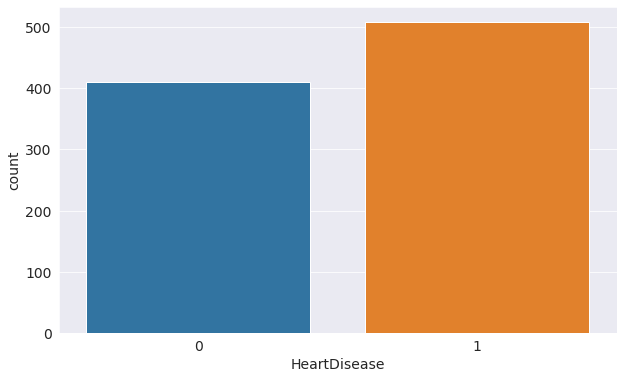

In [ ]:
# Patient without disease and those with disease
sns.countplot(x='HeartDisease', data=dataset)

In [ ]:

px.pie(dataset, names='ChestPainType')

In [ ]:
px.bar(dataset, x='ChestPainType')

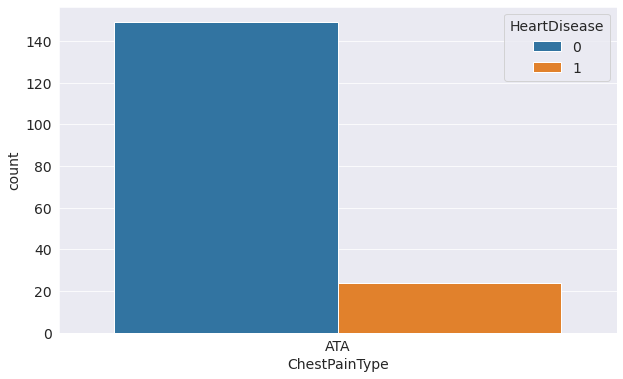

In [ ]:
sns.countplot(data = dataset[dataset['ChestPainType'] == 'ATA'], x='ChestPainType', hue='HeartDisease')

In [3]:
# Patients with heart disease
with_heart_disease = dataset[dataset['HeartDisease'] == 1]
with_heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [ ]:
with_heart_disease['Sex'].value_counts()

M    458
F     50
Name: Sex, dtype: int64

I see a pattern in the ST_Slope for those with heart disease

There are more male with heart disease than female. why is that? well studies have shown that excessive alcohol consumption and smoking is more favorable amongs women than it is for men. 

https://pubmed.ncbi.nlm.nih.gov/10863872/ <br>
https://www.cdc.gov/heartdisease/men.htm

In [ ]:
# Patients with heart disease
without_heart_disease = dataset[dataset['HeartDisease'] == 0]
without_heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


## Preparing a dataset for training

In [4]:
# Extracting the columns of our dataset and seperating them into the independent and dependent variable

input_columns = list(dataset.columns)[0:-1]
target_columns = 'HeartDisease'
print(input_columns)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [5]:
# Copying the values from the oraginal dataset into the dependent and independent set respectively

_inputs = dataset[input_columns].copy()
_targets = dataset[target_columns].copy()

In [ ]:
_inputs.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [6]:
# Seperating the categorical columns from the numerical columns

numeric_cols = _inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = _inputs.select_dtypes('object').columns.tolist()

In [ ]:
print('List of Numerical columns', numeric_cols)
print('List of Categorical columns', categorical_cols)

List of Numerical columns ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
List of Categorical columns ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Scaling numerical features

In [7]:
from sklearn.preprocessing import MinMaxScaler


In [8]:
scaler = MinMaxScaler().fit(dataset[numeric_cols])
_inputs[numeric_cols] = scaler.transform(_inputs[numeric_cols])


In [ ]:
_inputs[numeric_cols].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455


### Encoding Categorical Data

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(dataset[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [11]:
_inputs[encoded_cols] = encoder.transform(_inputs[categorical_cols])

In [ ]:
_inputs.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
# Now let's bring out only the scaled numerical and encoded categorical columns out

_inputs_data = _inputs[numeric_cols + encoded_cols]

In [13]:
_inputs_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
# saving the vectorized Heart Failure data

_inputs_data.to_csv('vectorized_HF_dataset.csv', index=False)

Spliting the dataset into training and testing

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( _inputs_data, _targets, test_size=0.35, random_state=42)

## Training and interpreting decision trees

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
model = DecisionTreeClassifier(random_state=42)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
train_preds = model.predict(X_train)
train_preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [22]:
# comparing the actual value versus the predicted value
accuracy_score(y_train, train_preds)

1.0

It learnt everything probably memorized it.

let see how good it is in our test data

In [23]:
model.score(X_test, y_test)

0.7670807453416149

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [24]:
model.feature_importances_

array([0.08829031, 0.04825898, 0.08917639, 0.02150844, 0.09522278,
       0.11313739, 0.02445164, 0.        , 0.07374853, 0.        ,
       0.00449254, 0.        , 0.        , 0.        , 0.01081016,
       0.01319682, 0.01635521, 0.00449254, 0.        , 0.39685829])

In [25]:
feature_importance_ = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
feature_importance_.head(10)

,feature,importance
19,ST_Slope_Up,0.396858
5,Oldpeak,0.113137
4,MaxHR,0.095223
2,Cholesterol,0.089176
0,Age,0.088290
8,ChestPainType_ASY,0.073749
1,RestingBP,0.048259
6,Sex_F,0.024452
3,FastingBS,0.021508
16,ExerciseAngina_Y,0.016355


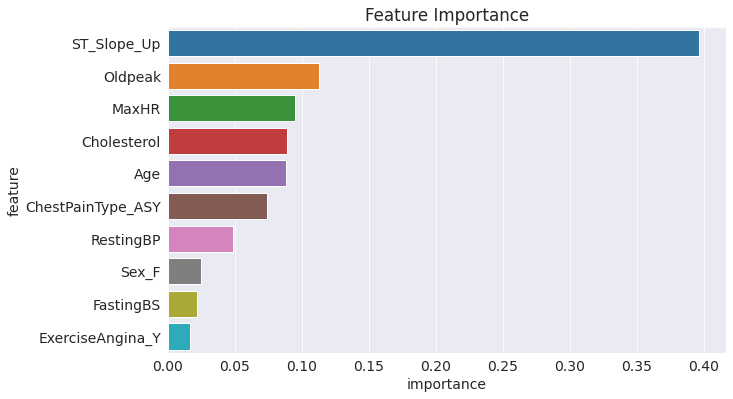

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=feature_importance_.head(10), x='importance', y='feature');

## Overfitting, hyperparameter tuning & regularization

In [26]:
model_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_1.fit(X_train, y_train)
print('The training accuracy is:',model.score(X_train, y_train))
print('Predictoin on the test dataset is:', model.score(X_test, y_test))

The training accuracy is: 1.0
Predictoin on the test dataset is: 0.7670807453416149


In [ ]:
?DecisionTreeClassifier

In [37]:
def max_depth_error(md, mss, msl, mf):
    model_1 = DecisionTreeClassifier(max_depth=md, min_samples_split= mss,

                                   min_samples_leaf=msl, max_features=mf, random_state=42)
    model_1.fit(X_train, y_train)
    train_err = 1 - model_1.score(X_train, y_train)
    train_acc = model_1.score(X_train, y_train)
    val_err = 1 - model_1.score(X_test, y_test)
    val_acc = model_1.score(X_test, y_test)
    return {'Max Depth': md, 'Training Error': train_err, 'Validation Error': val_err, 'Training Acc':train_acc, 'Val Acc': val_acc}

In [38]:
max_depth_error(7,2,1, mf='auto')

{'Max Depth': 7,
 'Training Acc': 0.9026845637583892,
 'Training Error': 0.09731543624161076,
 'Val Acc': 0.8416149068322981,
 'Validation Error': 0.15838509316770188}

## Making predictions on single inputs

In [51]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])

    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    _inputs_data = input_df[numeric_cols + encoded_cols]
    pred = model.predict(_inputs_data)[0]
    if pred == 1:
      prediction = print('The patient is Positive')
    else:
      prediction = print('The patient is Negative')
    prob = print('With a certainty of ',model.predict_proba(_inputs_data)[0][list(model.classes_).index(pred)])
    return

In [43]:
new_input = {'Age': 50,
             'Sex': 'M',
             'ChestPainType': 'NAP',
             'RestingBP': 140,
             'Cholesterol': 100,
             'FastingBS': 0,
             'RestingECG': 'Normal',
             'MaxHR': '150',
             'ExerciseAngina': 'N',
             'Oldpeak': '1',
             'ST_Slope': 'Flat'}

In [50]:
predict_input(model_1, new_input)

The patient is Positive
with a certainty of  0.6538461538461539
